<a href="https://colab.research.google.com/github/ancestor9/24_fall_textmining_NLP/blob/main/Ch_04_1_%EC%BD%94%EC%82%AC%EC%9D%B8%EC%9C%A0%EC%82%AC%EC%84%B1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Chapter 4.1. 코사인 유사도(Cosine similarity)


<img src = 'https://substackcdn.com/image/fetch/w_1456,c_limit,f_webp,q_auto:good,fl_progressive:steep/https%3A%2F%2Fsubstack-post-media.s3.amazonaws.com%2Fpublic%2Fimages%2F9b7020f2-925d-4d5c-8ea2-83b461f68fae_1483x1000.png' width=600 height=400>


### **Norm은 원점(0,0)으로 부터 L2 거리(유클리디언 거리)**

$$
\|a\| = \sqrt{3^2 + 4^2} = \sqrt{9 + 16} = \sqrt{25} = 5
$$

Cosine Similarity: 0.9922778767136677


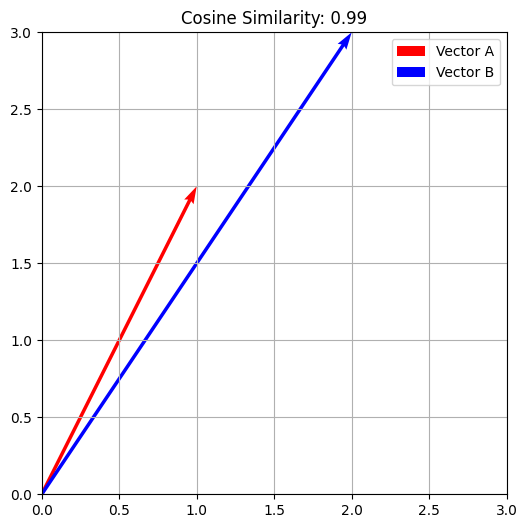

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# 벡터 A와 B
A = np.array([1, 2])
B = np.array([2, 3])

# 코사인 유사도 계산
cosine_similarity = np.dot(A, B) / (np.linalg.norm(A) * np.linalg.norm(B))

# 결과 출력
print("Cosine Similarity:", cosine_similarity)

# 벡터 시각화
plt.figure(figsize=(6, 6))
plt.quiver(0, 0, A[0], A[1], angles='xy', scale_units='xy', scale=1, color='r', label='Vector A')
plt.quiver(0, 0, B[0], B[1], angles='xy', scale_units='xy', scale=1, color='b', label='Vector B')

# 좌표 설정
plt.xlim(0, 3)
plt.ylim(0, 3)
plt.axhline(0, color='black',linewidth=0.5)
plt.axvline(0, color='black',linewidth=0.5)
plt.grid(True)
plt.legend()

# 그래프 출력
plt.title(f"Cosine Similarity: {cosine_similarity:.2f}")
plt.show()


In [2]:

from sklearn.metrics.pairwise import cosine_similarity

# 벡터 A와 B
A = np.array([1, 2]).reshape(1, -1)  # reshape을 통해 2D 배열로 변환
B = np.array([2, 3]).reshape(1, -1)

# 코사인 유사도 계산
cosine_sim = cosine_similarity(A, B)

# 결과 출력
print("Cosine Similarity:", cosine_sim[0][0])


Cosine Similarity: 0.9922778767136676


## 영화데이터로 실습

In [3]:
import nltk
nltk.download('movie_reviews')
nltk.download('punkt')

[nltk_data] Downloading package movie_reviews to /root/nltk_data...
[nltk_data]   Package movie_reviews is already up-to-date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [4]:
from nltk.corpus import movie_reviews

# data 준비, movie_reviews.raw()를 사용하여 raw text를 추출

reviews = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]
reviews[0]

'plot : two teen couples go to a church party , drink and then drive . \nthey get into an accident . \none of the guys dies , but his girlfriend continues to see him in her life , and has nightmares . \nwhat\'s the deal ? \nwatch the movie and " sorta " find out . . . \ncritique : a mind-fuck movie for the teen generation that touches on a very cool idea , but presents it in a very bad package . \nwhich is what makes this review an even harder one to write , since i generally applaud films which attempt to break the mold , mess with your head and such ( lost highway & memento ) , but there are good and bad ways of making all types of films , and these folks just didn\'t snag this one correctly . \nthey seem to have taken this pretty neat concept , but executed it terribly . \nso what are the problems with the movie ? \nwell , its main problem is that it\'s simply too jumbled . \nit starts off " normal " but then downshifts into this " fantasy " world in which you , as an audience membe

In [5]:
from nltk.tokenize import RegexpTokenizer
from nltk.corpus import stopwords #일반적으로 분석대상이 아닌 단어들(불용어)
nltk.download('stopwords')

tokenizer = RegexpTokenizer("[\w']{3,}") # 정규포현식으로 토크나이저를 정의
english_stops = set(stopwords.words('english')) #영어 불용어를 가져옴

documents = [movie_reviews.raw(fileid) for fileid in movie_reviews.fileids()]

tokens = [[token for token in tokenizer.tokenize(doc) if token not in english_stops] for doc in documents]

word_count = {}
for text in tokens:
    for word in text:
        word_count[word] = word_count.get(word, 0) + 1

sorted_features = sorted(word_count, key=word_count.get, reverse=True)

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [6]:
print(len(sorted_features))

43030


In [7]:
word_features = sorted_features[:1000]

In [8]:
from sklearn.feature_extraction.text import CountVectorizer

#cv = CountVectorizer() #모든 매개변수에 디폴트 값을 사용하는 경우
#앞에서 생성한 word_features(1,0000개의 단어)를 이용하여 특성 집합을 지정하는 경우

cv = CountVectorizer(vocabulary=word_features)

In [9]:
cv

CountVectorizer(vocabulary=['film', 'one', 'movie', 'like', 'even', 'time',
                            'good', 'story', 'would', 'much', 'also', 'get',
                            'character', 'two', 'well', 'first', 'characters',
                            'see', 'way', 'make', 'life', 'really', 'films',
                            'plot', 'little', 'people', 'could', 'bad', 'scene',
                            'never', ...])

In [10]:
reviews[2]

"it is movies like these that make a jaded movie viewer thankful for the invention of the timex indiglo watch . \nbased on the late 1960's television show by the same name , the mod squad tells the tale of three reformed criminals under the employ of the police to go undercover . \nhowever , things go wrong as evidence gets stolen and they are immediately under suspicion . \nof course , the ads make it seem like so much more . \nquick cuts , cool music , claire dane's nice hair and cute outfits , car chases , stuff blowing up , and the like . \nsounds like a cool movie , does it not ? \nafter the first fifteen minutes , it quickly becomes apparent that it is not . \nthe mod squad is certainly a slick looking production , complete with nice hair and costumes , but that simply isn't enough . \nthe film is best described as a cross between an hour-long cop show and a music video , both stretched out into the span of an hour and a half . \nand with it comes every single clich ? . \nit does

In [11]:
import pandas as pd

source_cv = cv.transform([reviews[2]]) #코사인 유사도는 카운트 벡터에 대해 계산하므로 벡터로 변환
#transform은 반드시 리스트나 행렬 형태의 입력을 요구하므로 리스트로 만들어서 입력
df_source_cv = pd.DataFrame(source_cv.toarray(), columns=cv.get_feature_names_out())
df_source_cv

,film,one,movie,like,even,time,good,story,would,much,...,directing,mike,leading,ground,lies,forget,alive,baby,vampire,conclusion
0,8,5,2,4,4,1,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0


In [12]:
reviews_cv = cv.fit_transform(reviews) #reviews를 이용하여 count vector를 학습하고, 변환

df_reviews_cv = pd.DataFrame(reviews_cv.toarray(), columns=cv.get_feature_names_out())
df_reviews_cv.head()

,film,one,movie,like,even,time,good,story,would,much,...,directing,mike,leading,ground,lies,forget,alive,baby,vampire,conclusion
0,6,3,6,3,3,0,2,0,1,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,5,3,1,1,1,1,0,1,...,0,0,0,0,0,0,0,0,0,0
2,8,5,2,4,4,1,0,0,1,2,...,0,0,0,0,0,0,0,0,0,0
3,1,2,0,1,2,1,1,1,0,3,...,0,0,0,0,0,0,0,0,0,0
4,2,3,2,1,4,2,1,3,0,2,...,0,0,0,0,0,0,0,0,0,1


In [13]:
print("#대상 특성 행렬의 크기:", source_cv.shape) #행렬의 크기를 확인, 문서가 하나이므로 (1, 1000)
print("#비교 대상 특성 행렬의 크기:", df_reviews_cv.shape) #행렬의 크기를 확인, 모든 문서 (2000, 1000)

sim_result = cosine_similarity(source_cv, reviews_cv) #변환된 count vector와 기존 값들과의 similarity 계산
sim_result

#대상 특성 행렬의 크기: (1, 1000)
#비교 대상 특성 행렬의 크기: (2000, 1000)


array([[0.42641433, 0.21193975, 1.        , ..., 0.32461111, 0.41029891,
        0.36466301]])

In [14]:
print("#유사도 계산 행렬의 크기:", sim_result.shape)

#유사도 계산 행렬의 크기: (1, 2000)


In [15]:
# prompt: sim_result를 데이터프레임으로 컬럼명
#Transpose sim_result so it has 2000 rows and 1 column

df_sim_result = pd.DataFrame(sim_result.T, columns=['similarity'])

df_sim_result

,similarity
0,0.426414
1,0.211940
2,1.000000
3,0.293765
4,0.308831
...,...
1995,0.289970
1996,0.110171
1997,0.324611
1998,0.410299


In [16]:
import numpy as np
print('#가장 유사한 리뷰의 인덱스:', np.argmax(sim_result[0]))

#가장 유사한 리뷰의 인덱스: 2


## **코사인 유사성 예제**
<img src ='https://images.unsplash.com/photo-1611604548018-d56bbd85d681?w=500&auto=format&fit=crop&q=60&ixlib=rb-4.0.3&ixid=M3wxMjA3fDB8MHxzZWFyY2h8MTJ8fGJhdG1hbiUyMGNhdHdvbWFufGVufDB8fDB8fHww
'>

In [17]:
Batman_quotes = [
    "I'm Batman.",
    "It's not who I am underneath, but what I do that defines me.",
    "You either die a hero or live long enough to see yourself become the villain.",
    "I’m whatever Gotham needs me to be.",
    "The night is darkest just before the dawn.",
    "Why so serious?",
    "Madness is like gravity. All it takes is a little push.",
    "Some men just want to watch the world burn.",
    "You think darkness is your ally?",
    "I was born in it, molded by it.",
    "A hero can be anyone.",
    "You fight like a younger man, with nothing held back.",
    "I never said thank you.",
    "And you'll never have to.",
    "You’re not the devil. You’re practice.",
    "Do you feel in charge?",
    "This city just showed you that it’s full of people ready to believe in good.",
    "You have nothing, nothing to threaten me with.",
    "You either die a hero, or you live long enough to see yourself become the villain.",
    "I’m not a monster. I’m just ahead of the curve.",
    "Sometimes the truth isn’t good enough.",
    "I am vengeance. I am the night.",
    "Why do we fall, sir? So that we can learn to pick ourselves up.",
    "Theatricality and deception are powerful agents.",
    "I’m Batman. I have one rule.",
    "You’ve changed things… forever.",
    "If you’re good at something, never do it for free.",
    "Endure, Master Wayne. Take it. They’ll hate you for it, but that’s the point of Batman.",
    "Let the games begin.",
    "Introduce a little anarchy.",
    "It’s not about money. It’s about sending a message.",
    "You’ll hunt me. You’ll condemn me. Set the dogs on me.",
    "This isn't a car.",
    "Does it depress you how alone you really are?",
    "I own the night.",
    "I will show you where I have made my home while preparing to bring justice.",
    "Sometimes people deserve more than the truth. Sometimes they deserve to have their faith rewarded.",
    "I’ll be standing where I belong. Between you and the people of Gotham.",
    "You don’t fear death. You welcome it.",
    "The Joker cannot win. Gotham needs its true hero.",
    "I make my own luck.",
    "Do you want to know why I use a knife? Guns are too quick.",
    "I’m not afraid. I’m angry.",
    "Your punishment must be more severe.",
    "I’m the hero Gotham deserves, but not the one it needs right now.",
    "You think you can steal from us and just walk away?",
    "There’s a storm coming, Mr. Wayne.",
    "Peace has cost you your strength. Victory has defeated you.",
    "I see now what I have to become to stop men like him.",
    "I have sworn to protect Gotham, even from itself."
]

In [18]:
from sklearn.feature_extraction.text import TfidfVectorizer

# TF-IDF를 이용한 벡터화
vectorizer = TfidfVectorizer()
tfidf_matrix = vectorizer.fit_transform(Batman_quotes)


In [19]:
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns=vectorizer.get_feature_names_out())
df_tfidf

,about,afraid,agents,ahead,all,ally,alone,am,anarchy,and,...,who,why,will,win,with,world,you,younger,your,yourself
0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.320404,0.00000,0.000000,...,0.354295,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.143971,0.000000,0.000000,0.299803
3,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
5,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.000000,0.527187,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
6,0.000000,0.000000,0.000000,0.000000,0.321518,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.385695,0.000000,0.000000,0.000000,0.000000
8,0.000000,0.000000,0.000000,0.000000,0.000000,0.476417,0.00000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.206900,0.000000,0.398509,0.000000
9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.00000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000


In [20]:
# 코사인 유사성 계산
cosine_sim = cosine_similarity(tfidf_matrix)

# 결과를 DataFrame으로 보기 좋게 출력
cosine_sim_df = pd.DataFrame(cosine_sim, index=Batman_quotes, columns=Batman_quotes)
cosine_sim_df


,I'm Batman.,"It's not who I am underneath, but what I do that defines me.",You either die a hero or live long enough to see yourself become the villain.,I’m whatever Gotham needs me to be.,The night is darkest just before the dawn.,Why so serious?,Madness is like gravity. All it takes is a little push.,Some men just want to watch the world burn.,You think darkness is your ally?,"I was born in it, molded by it.",...,I make my own luck.,Do you want to know why I use a knife? Guns are too quick.,I’m not afraid. I’m angry.,Your punishment must be more severe.,"I’m the hero Gotham deserves, but not the one it needs right now.",You think you can steal from us and just walk away?,"There’s a storm coming, Mr. Wayne.",Peace has cost you your strength. Victory has defeated you.,I see now what I have to become to stop men like him.,"I have sworn to protect Gotham, even from itself."
I'm Batman.,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
"It's not who I am underneath, but what I do that defines me.",0.000000,1.000000,0.000000,0.112110,0.000000,0.000000,0.040710,0.000000,0.000000,0.102287,...,0.000000,0.063941,0.111280,0.000000,0.194975,0.000000,0.000000,0.000000,0.101337,0.000000
You either die a hero or live long enough to see yourself become the villain.,0.000000,0.000000,1.000000,0.049957,0.066751,0.000000,0.000000,0.068755,0.029788,0.000000,...,0.000000,0.052458,0.000000,0.000000,0.122041,0.043528,0.000000,0.038675,0.230091,0.039234
I’m whatever Gotham needs me to be.,0.000000,0.112110,0.049957,1.000000,0.000000,0.000000,0.000000,0.058122,0.000000,0.000000,...,0.000000,0.049556,0.000000,0.139681,0.227814,0.000000,0.000000,0.000000,0.105406,0.175284
The night is darkest just before the dawn.,0.000000,0.000000,0.066751,0.000000,1.000000,0.000000,0.184781,0.164592,0.136902,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.142673,0.078457,0.000000,0.000000,0.000000,0.000000
Why so serious?,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.145014,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
Madness is like gravity. All it takes is a little push.,0.000000,0.040710,0.000000,0.000000,0.184781,0.000000,1.000000,0.000000,0.214350,0.092824,...,0.000000,0.000000,0.000000,0.000000,0.040709,0.000000,0.000000,0.000000,0.078676,0.000000
Some men just want to watch the world burn.,0.000000,0.000000,0.068755,0.058122,0.164592,0.000000,0.000000,1.000000,0.000000,0.000000,...,0.000000,0.140841,0.000000,0.000000,0.066994,0.073681,0.000000,0.000000,0.189253,0.045647
You think darkness is your ally?,0.000000,0.000000,0.029788,0.000000,0.136902,0.000000,0.214350,0.000000,1.000000,0.000000,...,0.000000,0.029548,0.000000,0.147147,0.000000,0.198182,0.000000,0.158677,0.000000,0.000000
"I was born in it, molded by it.",0.000000,0.102287,0.000000,0.000000,0.000000,0.000000,0.092824,0.000000,0.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,0.102286,0.000000,0.000000,0.000000,0.000000,0.000000


In [21]:
characters = [
    "Batman", "Batman", "Harvey Dent", "Batman", "Harvey Dent", "Joker", "Joker", "Alfred",
    "Bane", "Bane", "Batman", "Bane", "Batman", "Jim Gordon", "Batman", "Bane", "Batman",
    "Joker", "Harvey Dent", "Joker", "Batman", "Batman", "Alfred", "Ra's al Ghul", "Batman",
    "Joker", "Joker", "Alfred", "Bane", "Joker", "Joker", "Batman", "Batman", "Joker",
    "Batman", "Bane", "Batman", "Batman", "Bane", "Harvey Dent", "Harvey Dent", "Joker",
    "Bruce Wayne", "Bane", "Batman", "Mob Boss", "Selina Kyle", "Bane", "Bruce Wayne", "Batman"
]

In [22]:
cosine_sim_df = pd.DataFrame(cosine_sim, index=characters, columns=characters)
cosine_sim_df.round(2)

,Batman,Batman,Harvey Dent,Batman,Harvey Dent,Joker,Joker,Alfred,Bane,Bane,...,Harvey Dent,Joker,Bruce Wayne,Bane,Batman,Mob Boss,Selina Kyle,Bane,Bruce Wayne,Batman
Batman,1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,...,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Batman,0.00,1.00,0.00,0.11,0.00,0.00,0.04,0.00,0.00,0.10,...,0.00,0.06,0.11,0.00,0.19,0.00,0.00,0.00,0.10,0.00
Harvey Dent,0.00,0.00,1.00,0.05,0.07,0.00,0.00,0.07,0.03,0.00,...,0.00,0.05,0.00,0.00,0.12,0.04,0.00,0.04,0.23,0.04
Batman,0.00,0.11,0.05,1.00,0.00,0.00,0.00,0.06,0.00,0.00,...,0.00,0.05,0.00,0.14,0.23,0.00,0.00,0.00,0.11,0.18
Harvey Dent,0.00,0.00,0.07,0.00,1.00,0.00,0.18,0.16,0.14,0.00,...,0.00,0.00,0.00,0.00,0.14,0.08,0.00,0.00,0.00,0.00
Joker,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,0.00,...,0.00,0.15,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
Joker,0.00,0.04,0.00,0.00,0.18,0.00,1.00,0.00,0.21,0.09,...,0.00,0.00,0.00,0.00,0.04,0.00,0.00,0.00,0.08,0.00
Alfred,0.00,0.00,0.07,0.06,0.16,0.00,0.00,1.00,0.00,0.00,...,0.00,0.14,0.00,0.00,0.07,0.07,0.00,0.00,0.19,0.05
Bane,0.00,0.00,0.03,0.00,0.14,0.00,0.21,0.00,1.00,0.00,...,0.00,0.03,0.00,0.15,0.00,0.20,0.00,0.16,0.00,0.00
Bane,0.00,0.10,0.00,0.00,0.00,0.00,0.09,0.00,0.00,1.00,...,0.00,0.00,0.00,0.00,0.10,0.00,0.00,0.00,0.00,0.00


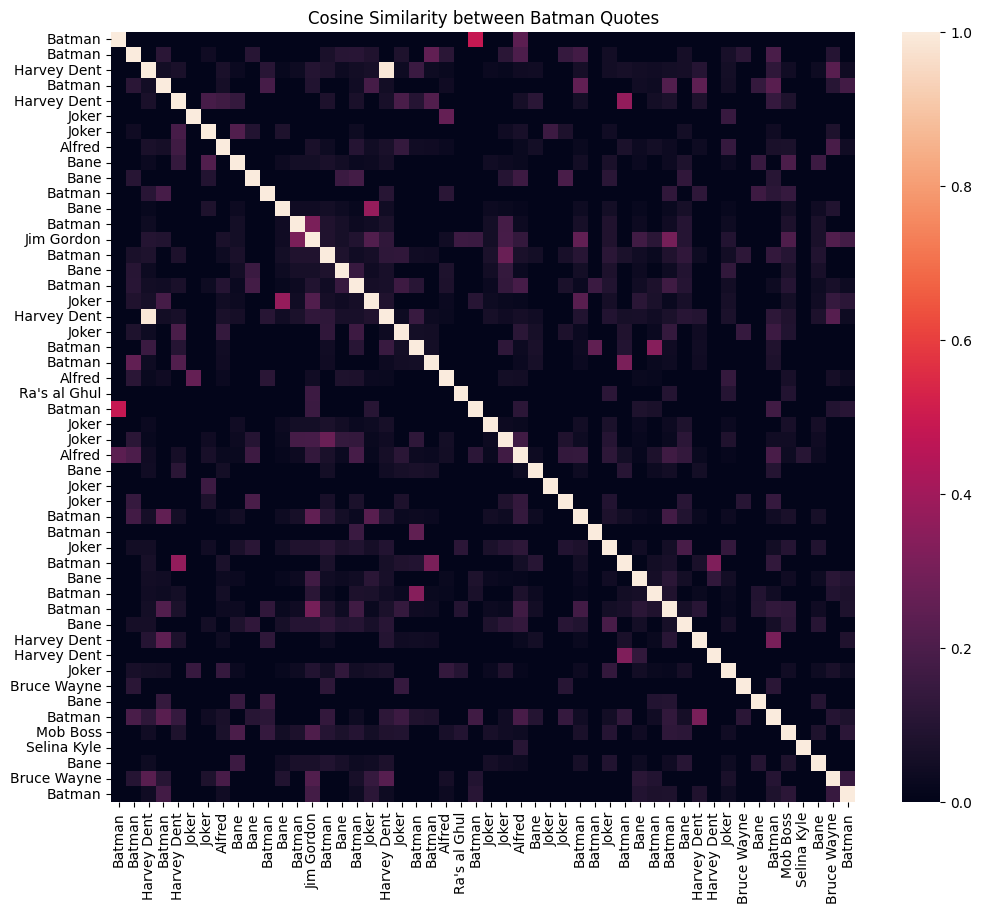

In [23]:
import seaborn as sns

plt.figure(figsize=(12, 10))
sns.heatmap(cosine_sim_df)
plt.title("Cosine Similarity between Batman Quotes")
plt.show()

## 4.5. 카운트 벡터의 활용/ TF-IDF로 성능을 높여보자
- https://wikidocs.net/24559 (DTM),
- https://wikidocs.net/31698

In [24]:
from sklearn.feature_extraction.text import CountVectorizer

# 문장 리스트
documents = [
    "먹고 싶은 사과",  # 문서 1
    "먹고 싶은 바나나",  # 문서 2
    "길고 노란 바나나 바나나",  # 문서 3
    "저는 과일이 좋아요"  # 문서 4
]

# CountVectorizer를 사용해 DTM 생성
vectorizer = CountVectorizer()
dtm = vectorizer.fit_transform(documents)

# DTM을 배열로 변환
dtm_array = dtm.toarray()

# 단어 리스트
vocab = vectorizer.get_feature_names_out()

# DTM 결과 출력
df_dtm = pd.DataFrame(dtm_array, columns=vocab)
df_dtm

,과일이,길고,노란,먹고,바나나,사과,싶은,저는,좋아요
0,0,0,0,1,0,1,1,0,0
1,0,0,0,1,1,0,1,0,0
2,0,1,1,0,2,0,0,0,0
3,1,0,0,0,0,0,0,1,1


In [25]:
import numpy as np

# Document-Term Matrix (DTM)
dtm = df_dtm.values
dtm

array([[0, 0, 0, 1, 0, 1, 1, 0, 0],
       [0, 0, 0, 1, 1, 0, 1, 0, 0],
       [0, 1, 1, 0, 2, 0, 0, 0, 0],
       [1, 0, 0, 0, 0, 0, 0, 1, 1]])

In [26]:
np.sum(dtm)

13

In [27]:
# 1. Term Frequency (TF)
tf = dtm / np.sum(dtm, axis=1, keepdims=True)
tf.round(2)

array([[0.  , 0.  , 0.  , 0.33, 0.  , 0.33, 0.33, 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.33, 0.33, 0.  , 0.33, 0.  , 0.  ],
       [0.  , 0.25, 0.25, 0.  , 0.5 , 0.  , 0.  , 0.  , 0.  ],
       [0.33, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.33, 0.33]])

In [28]:
# 2. Inverse Document Frequency (IDF)
# Document count
N = dtm.shape[0]
N

4

In [29]:
# Count how many documents contain each term (term count in documents)
df = np.sum(dtm > 0, axis=0)
df

array([1, 1, 1, 2, 2, 1, 2, 1, 1])

In [30]:
# IDF calculation (logarithmic form)
idf = np.log(N / (df + 1))  # +1 to avoid division by zero
idf

array([0.69314718, 0.69314718, 0.69314718, 0.28768207, 0.28768207,
       0.69314718, 0.28768207, 0.69314718, 0.69314718])

In [31]:

# 3. TF-IDF
tf_idf = tf * idf
tf_idf.round(2)


array([[0.  , 0.  , 0.  , 0.1 , 0.  , 0.23, 0.1 , 0.  , 0.  ],
       [0.  , 0.  , 0.  , 0.1 , 0.1 , 0.  , 0.1 , 0.  , 0.  ],
       [0.  , 0.17, 0.17, 0.  , 0.14, 0.  , 0.  , 0.  , 0.  ],
       [0.23, 0.  , 0.  , 0.  , 0.  , 0.  , 0.  , 0.23, 0.23]])

### scikit-learn

In [32]:
from sklearn.feature_extraction.text import TfidfVectorizer
corpus = [
    'This is the first document.',
    'This document is the second document.',
    'And this is the third one.',
    'Is this the first document?',
]
vectorizer = TfidfVectorizer()
X = vectorizer.fit_transform(corpus)
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

,and,document,first,is,one,second,the,third,this
0,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085
1,0.000000,0.687624,0.000000,0.281089,0.000000,0.538648,0.281089,0.000000,0.281089
2,0.511849,0.000000,0.000000,0.267104,0.511849,0.000000,0.267104,0.511849,0.267104
3,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085


In [33]:
from sklearn.feature_extraction.text import CountVectorizer

vectorizer = CountVectorizer()
X1 = vectorizer.fit_transform(corpus)

pd.DataFrame(X1.toarray(), columns=vectorizer.get_feature_names_out())

,and,document,first,is,one,second,the,third,this
0,0,1,1,1,0,0,1,0,1
1,0,2,0,1,0,1,1,0,1
2,1,0,0,1,1,0,1,1,1
3,0,1,1,1,0,0,1,0,1


In [34]:

vectorizer2 = CountVectorizer(analyzer='word', ngram_range=(2, 2))
X2 = vectorizer2.fit_transform(corpus)
vectorizer2.get_feature_names_out()

pd.DataFrame(X2.toarray(), columns=vectorizer2.get_feature_names_out())

,and this,document is,first document,is the,is this,second document,the first,the second,the third,third one,this document,this is,this the
0,0,0,1,1,0,0,1,0,0,0,0,1,0
1,0,1,0,1,0,1,0,1,0,0,1,0,0
2,1,0,0,1,0,0,0,0,1,1,0,1,0
3,0,0,1,0,1,0,1,0,0,0,0,0,1


### corpus에서 countervector를 하여 tf-idf를 구한 값과 직접 tf-idf를 구한 값은 동일

In [35]:
from sklearn.feature_extraction.text import TfidfTransformer

tf= TfidfTransformer()
X3 = tf.fit_transform(X)

pd.DataFrame(X3.toarray(), columns=tf.get_feature_names_out())

,x0,x1,x2,x3,x4,x5,x6,x7,x8
0,0.000000,0.462837,0.706158,0.309366,0.000000,0.000000,0.309366,0.000000,0.309366
1,0.000000,0.593259,0.000000,0.198271,0.000000,0.728086,0.198271,0.000000,0.198271
2,0.557064,0.000000,0.000000,0.151699,0.557064,0.000000,0.151699,0.557064,0.151699
3,0.000000,0.462837,0.706158,0.309366,0.000000,0.000000,0.309366,0.000000,0.309366


In [36]:
pd.DataFrame(X.toarray(), columns=vectorizer.get_feature_names_out())

,and,document,first,is,one,second,the,third,this
0,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085
1,0.000000,0.687624,0.000000,0.281089,0.000000,0.538648,0.281089,0.000000,0.281089
2,0.511849,0.000000,0.000000,0.267104,0.511849,0.000000,0.267104,0.511849,0.267104
3,0.000000,0.469791,0.580286,0.384085,0.000000,0.000000,0.384085,0.000000,0.384085


In [37]:
# prompt: X3와 X는 같은 행렬인지 비교

# X3와 X가 같은 행렬인지 비교
are_equal = np.allclose(X3.toarray(), X.toarray())

if are_equal:
  print("X3와 X는 같은 행렬입니다.")
else:
  print("X3와 X는 다른 행렬입니다.")

X3와 X는 다른 행렬입니다.


In [38]:
reviews_cv

<2000x1000 sparse matrix of type '<class 'numpy.int64'>'
	with 252984 stored elements in Compressed Sparse Row format>

In [39]:
from sklearn.feature_extraction.text import TfidfTransformer
transformer = TfidfTransformer()
transformer

reviews_tfidf = transformer.fit_transform(reviews_cv)
print('#shape of tfidf matrix:', reviews_tfidf.shape) #TF-IDF 행렬의 모양과 카운트 행렬의 모양이 일치하는 것을 확인

#첫 리뷰의 카운트 벡터 중 앞 20개 값 출력
print('#20 count score of the first review:', reviews_cv[0].toarray()[0][:20])
#첫 리뷰의 TF-IDF 벡터 중 앞 20개 값 출력
print('#20 tfidf score of the first review:', reviews_tfidf[0].toarray()[0][:20])

#shape of tfidf matrix: (2000, 1000)
#20 count score of the first review: [6 3 6 3 3 0 2 0 1 0 1 3 2 2 1 0 1 2 3 5]
#20 tfidf score of the first review: [0.13556199 0.06700076 0.14998642 0.0772298  0.08608998 0.
 0.0609124  0.         0.03126552 0.         0.03242315 0.09567082
 0.06575035 0.06518293 0.03225625 0.         0.0345017  0.06863314
 0.10042383 0.16727495]


In [42]:
from sklearn.feature_extraction.text import TfidfVectorizer

tf = TfidfVectorizer(vocabulary=word_features)
reviews_tf = tf.fit_transform(reviews)

source_tf = tf.transform([reviews[1]]) #코사인 유사도는 카운트 벡터에 대해 계산하므로 벡터로 변환
#transform은 반드시 리스트나 행렬 형태의 입력을 요구하므로 리스트로 만들어서 입력


In [43]:
# prompt: source_tf을 데이터프레임으로

df_source_tf = pd.DataFrame(source_tf.toarray(), columns=tf.get_feature_names_out())
df_source_tf

,film,one,movie,like,even,time,good,story,would,much,...,directing,mike,leading,ground,lies,forget,alive,baby,vampire,conclusion
0,0.0,0.0,0.21872,0.135146,0.050217,0.051121,0.053296,0.056511,0.0,0.05462,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [44]:
sim_result_tf = cosine_similarity(source_tf, reviews_tf) #변환된 count vector와 기존 값들과의 similarity 계산

print('#가장 유사한 리뷰의 인덱스:', np.argmax(sim_result_tf[0]))

#가장 유사한 리뷰의 인덱스: 1


In [45]:
print('#카운트 벡터에 대해 가장 유사한 리뷰부터 정렬한 인덱스:', (-sim_result[0]).argsort()[:10])
print('#TF-IDF 벡터에 대해 가장 유사한 리뷰부터 정렬한 인덱스:', (-sim_result_tf[0]).argsort()[:10])

#카운트 벡터에 대해 가장 유사한 리뷰부터 정렬한 인덱스: [   2 1597  428 1470  871  897  787 1501  100 1286]
#TF-IDF 벡터에 대해 가장 유사한 리뷰부터 정렬한 인덱스: [   1  297  967 1729  335  365 1900   78  254   49]
